# WALMART SALES REPORT



***Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores in the United States, headquartered in Bentonville, Arkansas.***





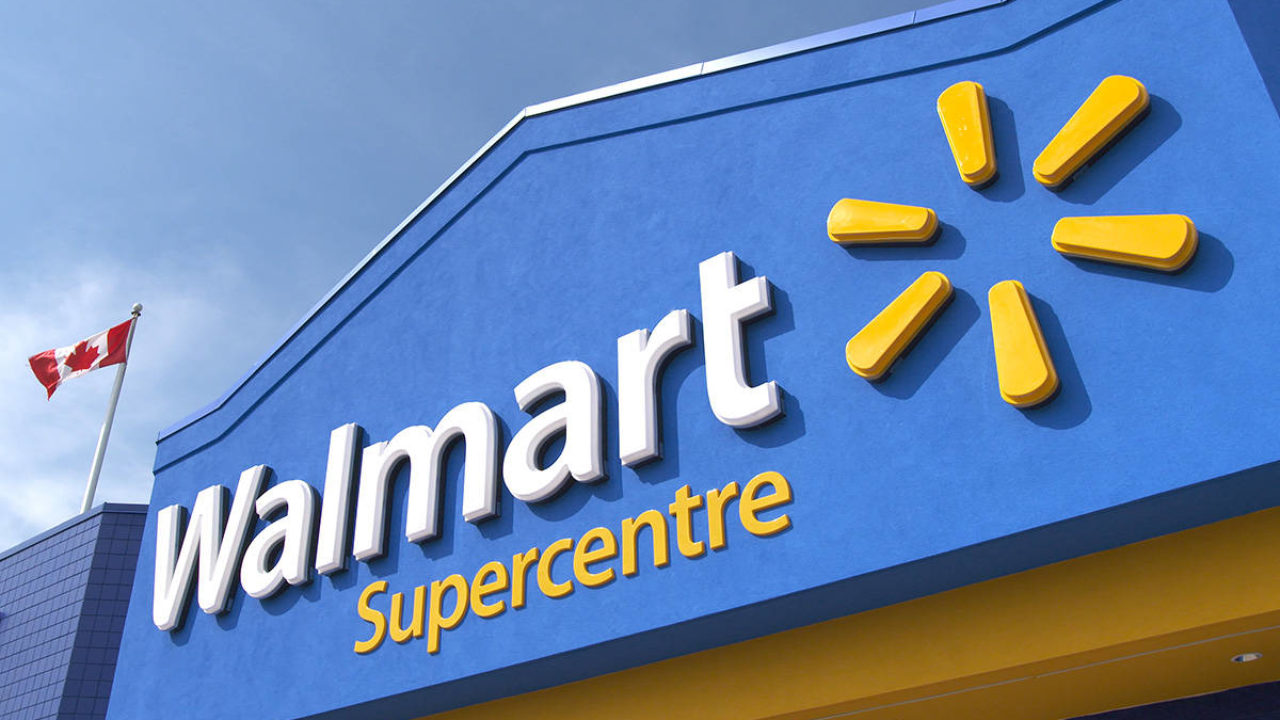

# DATASET OVERVIEW:

**Store** → Identifies the store where sales were recorded.

**Date** → The date corresponding to the weekly sales data.

**Weekly_Sales** → Total revenue generated by the store in a week.

**Holiday_Flag** → Indicates if the week includes a major holiday (1 = Yes, 0 = No).

**Temperature** → The average temperature (°F) recorded during the week.

**Fuel_Price** → The price of fuel per gallon in USD for that week.

**CPI** → Consumer Price Index, reflecting inflation trends.

**Unemployment** → The unemployment rate in the store’s region for that week.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = (pd.read_csv("/content/Walmart_Sales.csv")) #load the dataset

In [ ]:
df.head() #display first 5 rows

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
# Statistics about the data set
df.describe().style.background_gradient(cmap='bone_r')

In [ ]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

This dataset no null counts are present, thats good for furthur analysis


In [ ]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [ ]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [ ]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")


In [ ]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
# Extract additional time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week


# Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Univariate Analysis
Histogram for distribution of sales

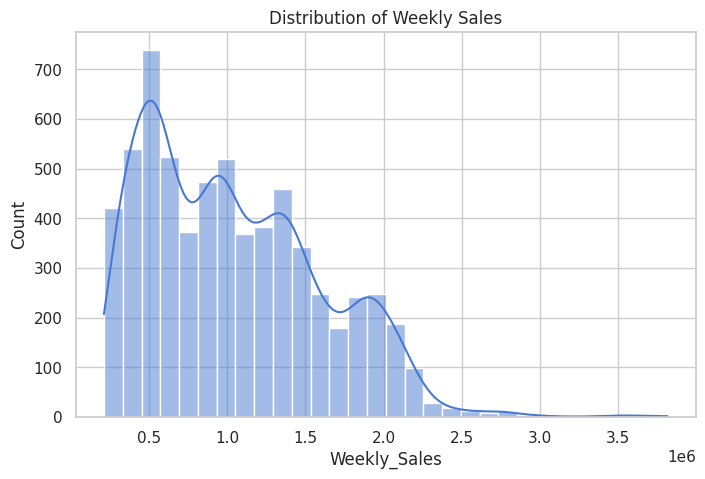

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Weekly_Sales'], bins=30, kde=True)
plt.title("Distribution of Weekly Sales")
plt.show()


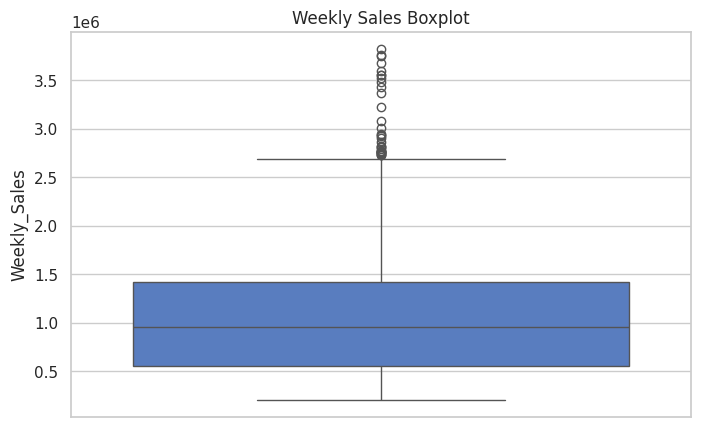

In [ ]:
# Boxplot to check for outliers
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Weekly_Sales'])
plt.title("Weekly Sales Boxplot")
plt.show()


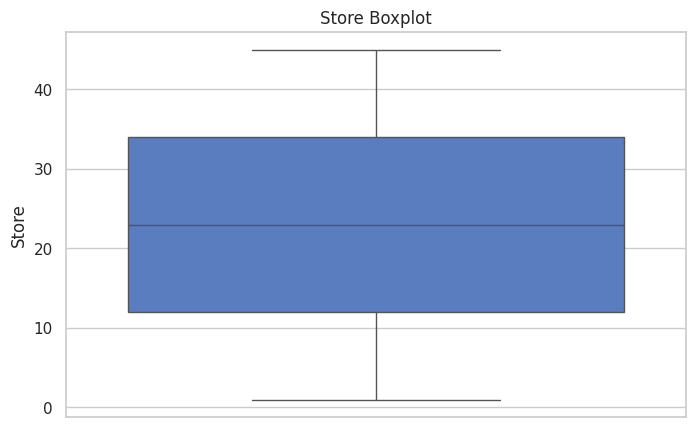

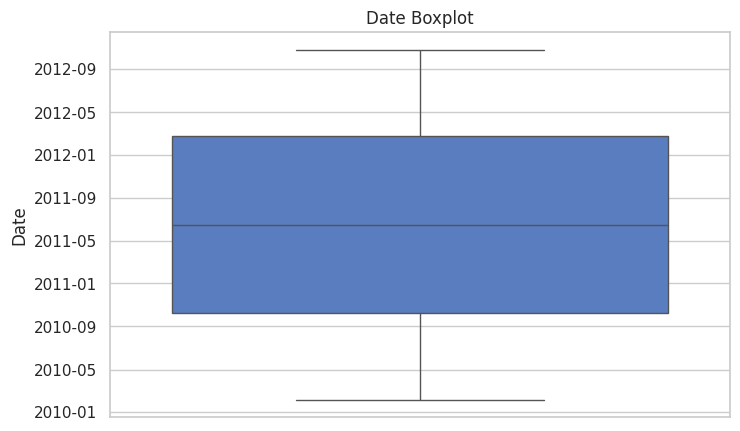

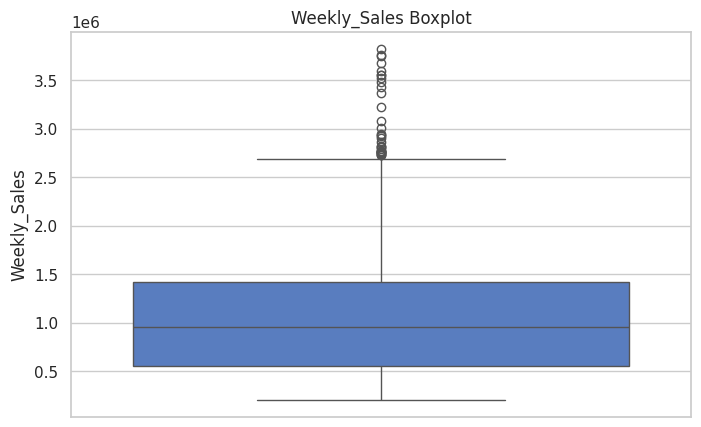

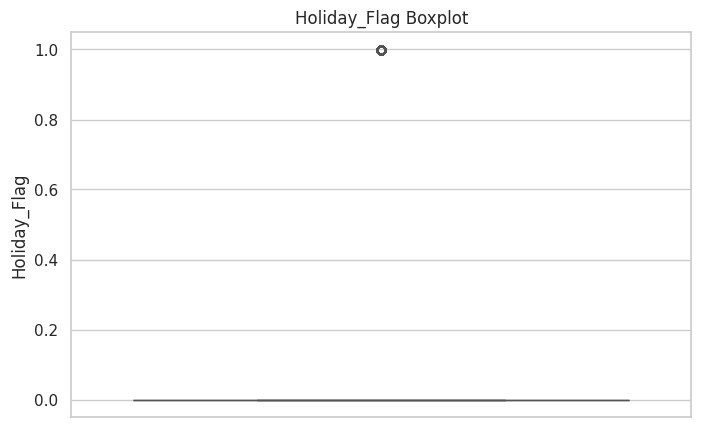

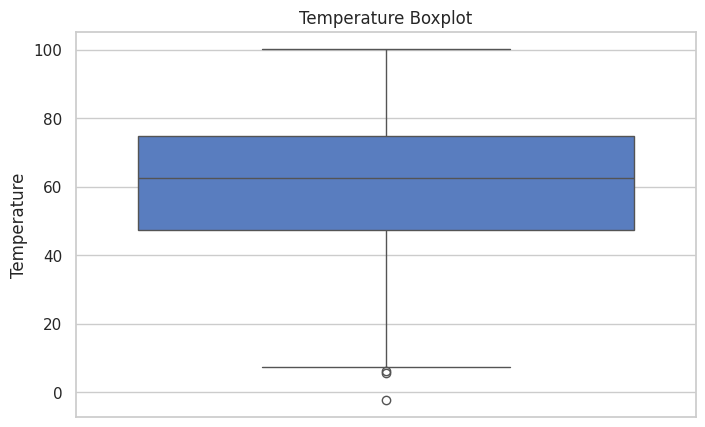

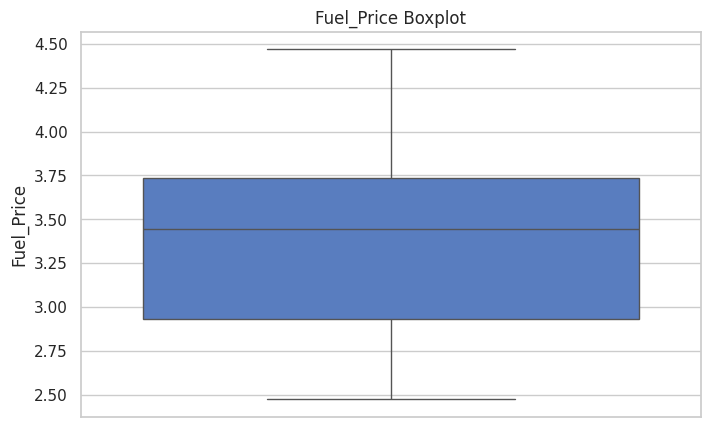

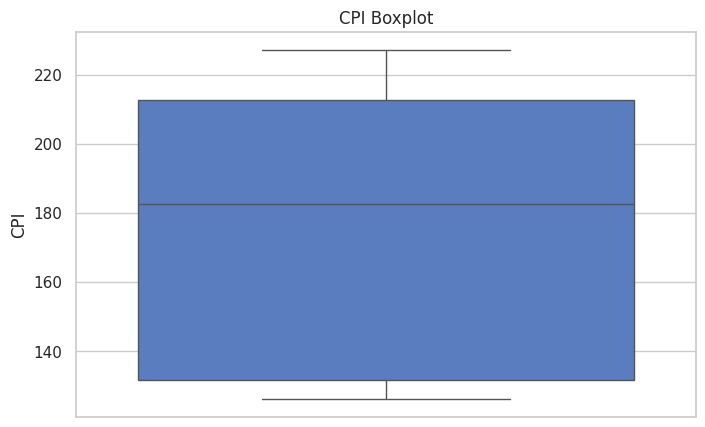

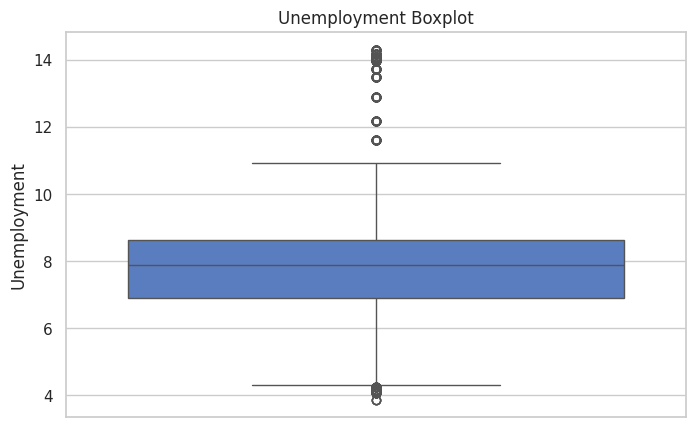

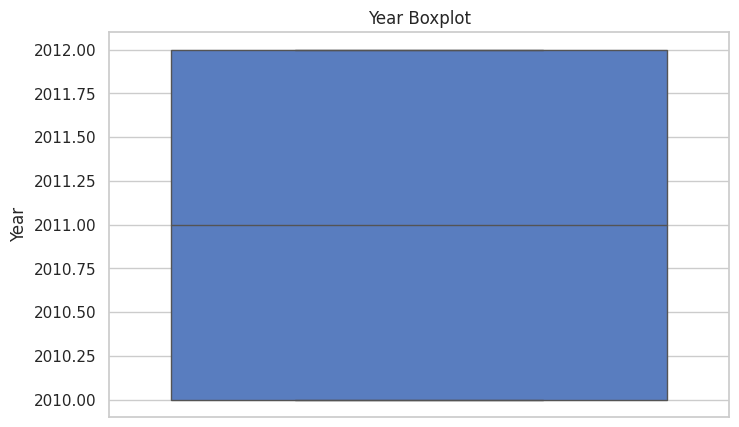

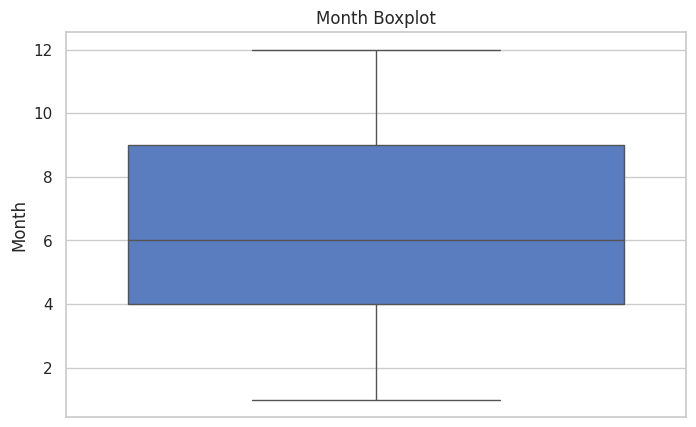

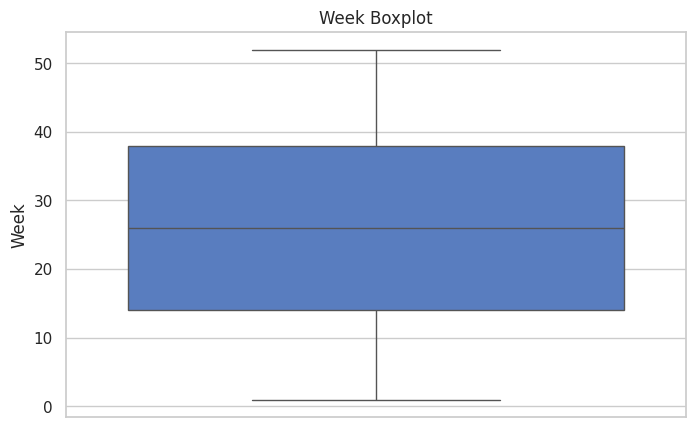

In [ ]:
# boxplot for all columns
for col in df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df[col])
    plt.title(f"{col} Boxplot")
    plt.show()


weekly sales, un employeement temperature columns are have outliers, it will be affect model performence.

# After Handling Outliers

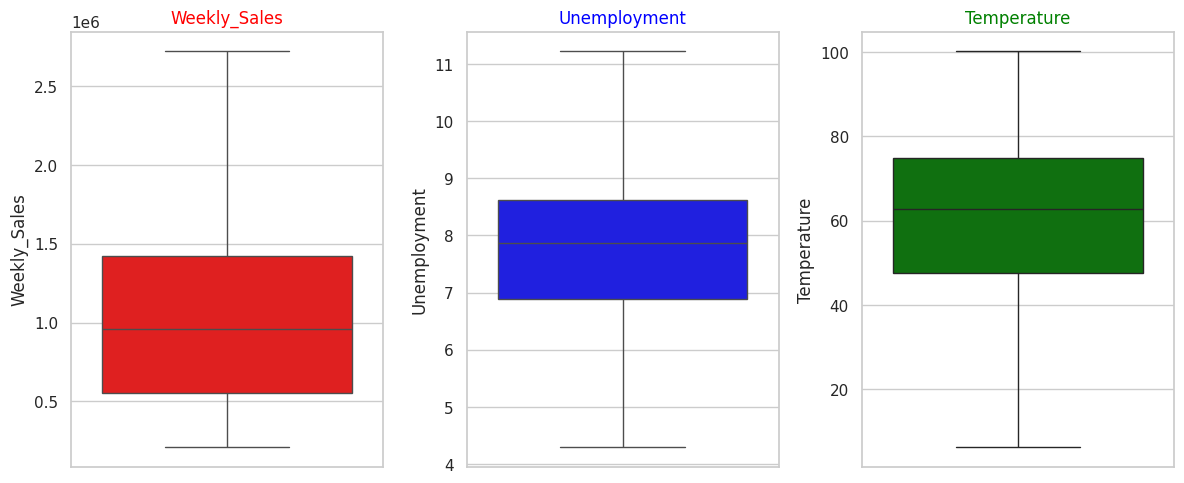

In [ ]:
# Columns to process
columns = ['Weekly_Sales', 'Unemployment', 'Temperature']
colors = ['red', 'blue', 'green']  # Different colors for each boxplot

# Capping function
for col in columns:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower, upper)

# Boxplot visualization with colors
plt.figure(figsize=(12, 5))
for i, (col, color) in enumerate(zip(columns, colors), 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color=color)  # Assign color
    plt.title(col, fontsize=12, color=color)
plt.tight_layout()
plt.show()

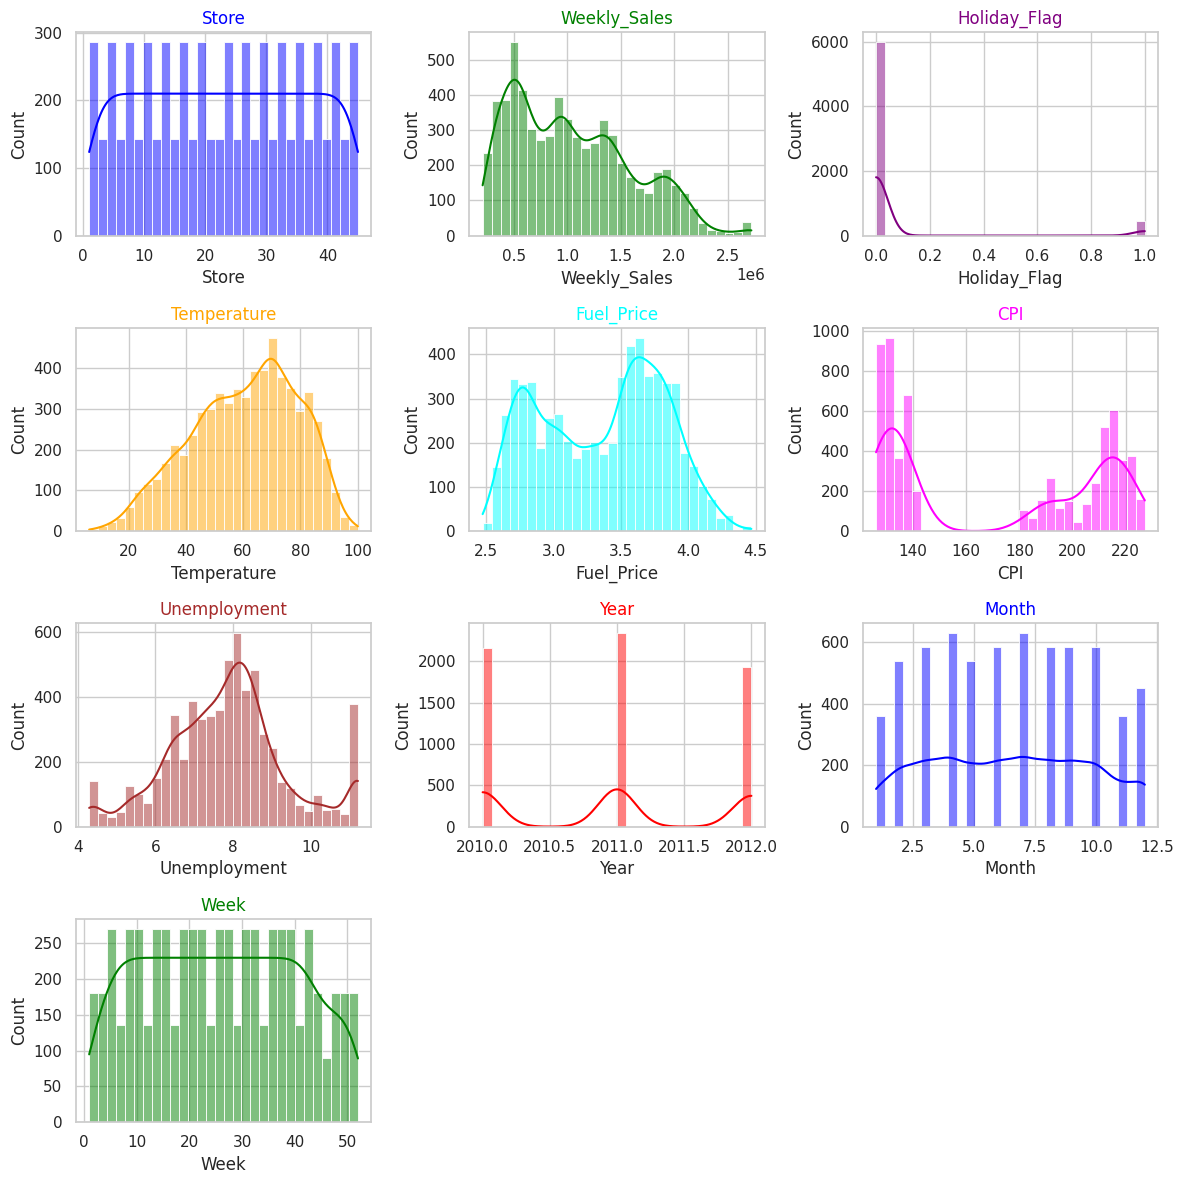

In [ ]:
import math
# Drop non-numeric columns (like 'Date' if needed)
df = df.select_dtypes(include=['number'])

# Define colors
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'brown']

# Define subplot grid size
num_cols = len(df.columns)
rows = math.ceil(num_cols / 3)  # Adjust rows dynamically

# Create subplots
plt.figure(figsize=(12, rows * 3))

for i, col in enumerate(df.columns, 1):
    plt.subplot(rows, 3, i)  # Adjust grid based on columns
    sns.histplot(df[col], bins=30, color=colors[i % len(colors)], kde=True)
    plt.title(col, fontsize=12, color=colors[i % len(colors)])

plt.tight_layout()
plt.show()

1. Store

The distribution is uniform, with each store having roughly equal frequency.

This indicates no particular store is over-represented or under-represented in the data.

2. Weekly Sales

Sales are right-skewed, meaning most stores have lower weekly sales, with a few outliers having significantly higher sales.

There might be high-performing stores that are responsible for these extreme values.

3. Holiday Flag

Most data points indicate non-holiday weeks, as evident from the high count at 0.

Holiday weeks (1) are comparatively rare.

4. Temperature


Temperature data follows a bell-shaped distribution, indicating it’s normally distributed.
This suggests a typical range for temperature, with no extreme outliers.

5. Fuel Price

Fuel prices have a bimodal distribution, indicating two distinct price levels.

This might reflect changes in fuel price trends over time.

6. CPI (Consumer Price Index)

CPI appears multi-modal, suggesting changes in economic conditions or different regions being represented in the data.

7. Unemployment

Unemployment has a normal distribution with a slight skew.

This suggests unemployment is relatively stable within a predictable range.

8. Year

Data points are grouped into three years: 2010, 2011, and 2012.

This suggests the dataset covers three years of sales data.

9. Month

Monthly data is relatively consistent, with no specific months having significantly higher or lower counts.

This suggests no significant seasonality effect on the dataset's coverage.

10. Week

Week distribution appears relatively uniform, indicating all weeks are equally represented.

There is no noticeable bias toward specific weeks in the data.

# **Overall Insights:**

Right-skewed distributions (e.g., Weekly Sales) suggest potential outliers or variability across stores.

Normal and bimodal distributions (e.g., Temperature, Fuel Price) indicate natural patterns or trends over time.

Consistent counts across categorical columns (e.g., Store, Week, Month) suggest good representation of data.

# **Bivariate Analysis**

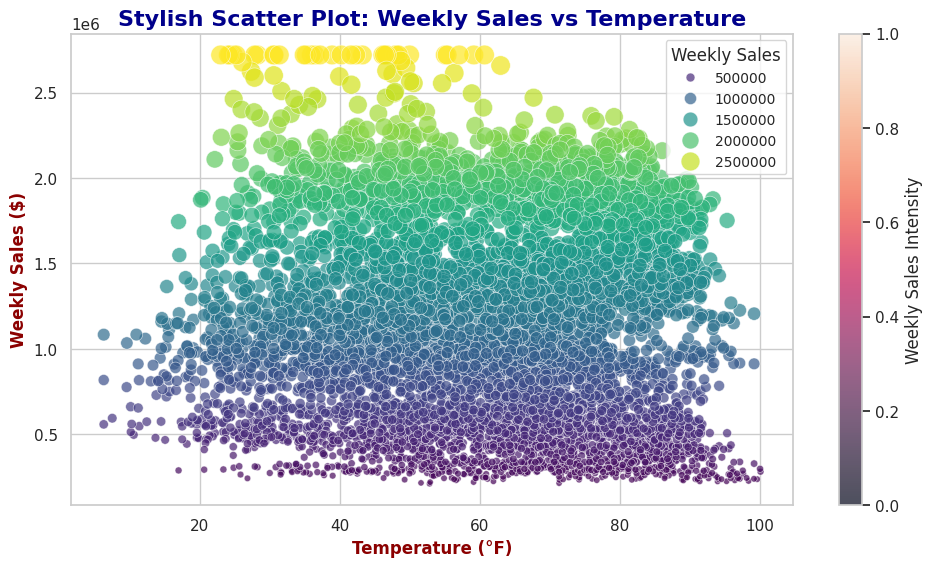

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Stylish scatter plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Scatter plot with custom color palette and marker size
scatter = sns.scatterplot(
    x=df['Temperature'],
    y=df['Weekly_Sales'],
    hue=df['Weekly_Sales'],  # Add color gradient based on Weekly Sales
    palette="viridis",
    size=df['Weekly_Sales'],  # Vary size based on Weekly Sales
    sizes=(20, 200),  # Adjust size range
    alpha=0.7  # Transparency for better overlap visibility
)

# Title and labels
plt.title("Stylish Scatter Plot: Weekly Sales vs Temperature", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Temperature (°F)", fontsize=12, fontweight='bold', color='darkred')
plt.ylabel("Weekly Sales ($)", fontsize=12, fontweight='bold', color='darkred')

# Adjust legend
plt.legend(title="Weekly Sales", title_fontsize=12, loc='upper right', fontsize=10)
plt.colorbar(scatter.collections[0], label='Weekly Sales Intensity')

# Show the plot
plt.tight_layout()
plt.show()


High Sales Across Temperatures:









Weekly sales show significant values at a wide range of temperatures, with the highest sales concentrated at the upper boundary of the plot (yellow points).

This suggests that high sales are less influenced by temperature extremes.

Moderate Sales Cluster:

A dense cluster of sales is visible between 40°F and 80°F, indicating that most transactions occur within this temperature range.

Low Sales at Very Low/High Temperatures:

At very low temperatures (<30°F) and very high temperatures (>90°F), sales tend to cluster in the lower range (purple points). This might imply reduced sales activity during extreme weather conditions.

Sales Distribution:

The gradual gradient from purple (low sales) to yellow (high sales) indicates a steady increase in sales with variations in temperature. However, this relationship is not perfectly linear, as evident from the spread.

Diversity in Sales Values:

For any given temperature range, there is a wide spread of sales values, showing that other factors (e.g., holidays, fuel prices) might significantly impact weekly sales alongside temperature.

Clear Color Coding:

The viridis color palette and the size of the points provide an intuitive representation of sales intensity, helping identify trends and outliers effectively.

---



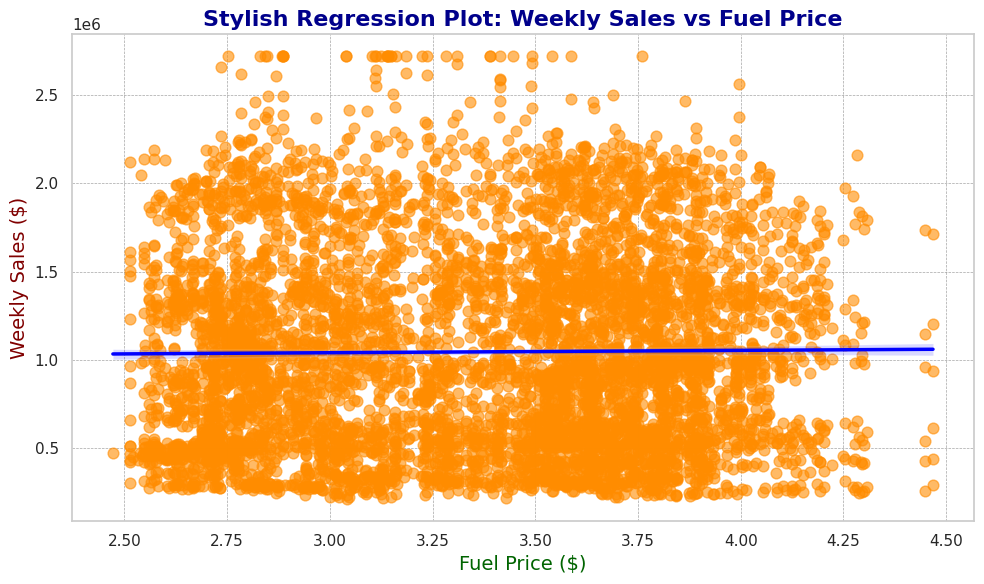

In [ ]:
# Sales vs Fuel Price
# Set a stylish theme
sns.set_theme(style="whitegrid", palette="muted")

# Create a figure with enhanced colors and style
plt.figure(figsize=(10, 6))
sns.regplot(
    x=df['Fuel_Price'],
    y=df['Weekly_Sales'],
    scatter_kws={'color': 'darkorange', 's': 60, 'alpha': 0.6},  # Scatter style
    line_kws={'color': 'blue', 'linewidth': 2.5}  # Regression line style
)

# Add titles and labels with enhanced font styles
plt.title("Stylish Regression Plot: Weekly Sales vs Fuel Price", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Fuel Price ($)", fontsize=14, color='darkgreen')
plt.ylabel("Weekly Sales ($)", fontsize=14, color='maroon')

# Add gridlines and adjust layout
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

**The regression plot between Weekly Sales ($) and Fuel Price ($) provides the following insights:**

Weak Correlation:

The regression line is almost flat, indicating a negligible or no linear relationship between weekly sales and fuel prices.

Scatter Distribution:

The data points are widely spread, showing high variance in weekly sales for a given range of fuel prices.
There is no clear trend, suggesting that fuel prices may not significantly impact weekly sales.

Weekly Sales Range:

Weekly sales mostly fall within the range of 0.5M to 2.5M dollars, regardless of the fuel price.

Fuel Price Range:

Fuel prices range from approximately $2.50 to $4.50. The distribution of sales seems uniform across this range.

Potential Influence of Other Factors:

The lack of a clear relationship suggests that other variables (e.g., promotions, seasonality, or regional factors) could be more influential on weekly sales than fuel prices.

# **Recommendations:**

Explore other features in the dataset to identify stronger predictors of weekly sales.

Perform multivariate analysis to see if the interaction between fuel price and another variable affects sales.

Investigate external factors that might influence sales trends, such as economic conditions or customer preferences.

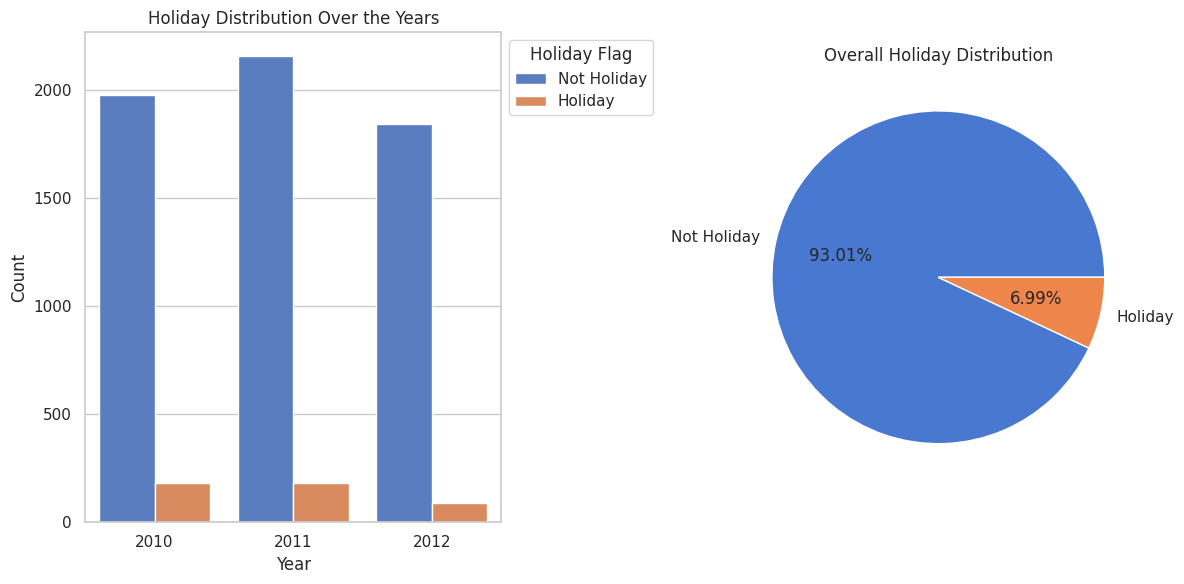

In [ ]:
# Group by year and holiday_flag to get counts
holiday_counts = df.groupby(['Year', 'Holiday_Flag']).size().unstack(fill_value=0).reset_index()

# Melt DataFrame to long format
holiday_counts_melted = pd.melt(holiday_counts, id_vars='Year', var_name='Holiday_Flag', value_name='Count')

# Plot using Seaborn
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot
sns.barplot(data=holiday_counts_melted, x='Year', y='Count', hue='Holiday_Flag', ax=ax[0])
ax[0].set_title('Holiday Distribution Over the Years')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Count')

# Get legend handles
handles, _ = ax[0].get_legend_handles_labels()

ax[0].legend(handles=handles, labels=['Not Holiday', 'Holiday'], title='Holiday Flag', loc='upper left', bbox_to_anchor=(1, 1))

ax[1].pie(df['Holiday_Flag'].value_counts().values, labels=['Not Holiday', 'Holiday'], autopct='%1.2f%%')
ax[1].set_title('Overall Holiday Distribution')

plt.tight_layout()
plt.show()

# **Bar Chart (Left Panel):**

Represents the distribution of holidays (orange) and non-holidays (blue) across the years 2010, 2011, and 2012.

**Insights:**

The majority of days in each year are non-holidays.

Holidays make up a small fraction of the days, relatively consistent across the three years.

# **Pie Chart (Right Panel):**

Shows the overall distribution of holidays and non-holidays.

**Insights:**

Non-holidays account for 93.01% of the total days.

Holidays represent 6.99% of the total days.

**Overall Insights:**

Non-holidays are overwhelmingly dominant in the dataset across all years.

The percentage of holidays is consistent with the overall small fraction observed annually.

**This analysis suggests that holidays are relatively rare in this dataset compared to regular (non-holiday) days.**

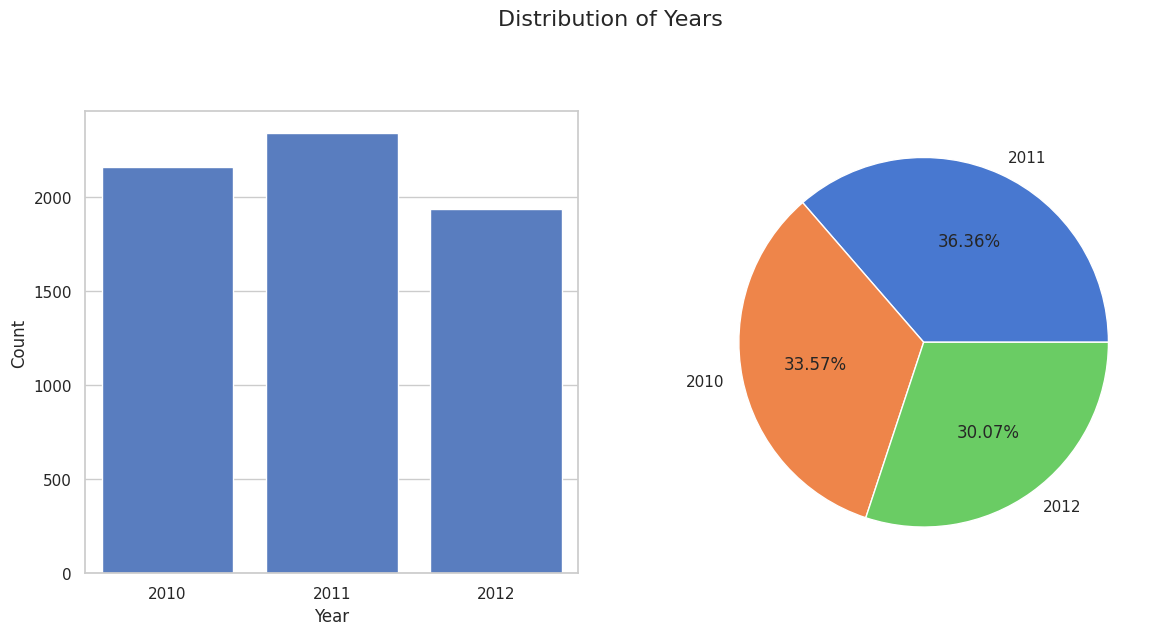

In [ ]:
# Calculate the count of each year
year_counts = df['Year'].value_counts()

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Countplot for the distribution of years
sns.countplot(data=df, x='Year', ax=ax[0])
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Count')

# Pie chart for the distribution of years
ax[1].pie(year_counts.values, labels=year_counts.index, autopct='%1.2f%%')

# Set a single title for the entire figure
plt.suptitle('Distribution of Years', fontsize=16, y=1.05)

plt.show()

# **Multivariate Analysis**

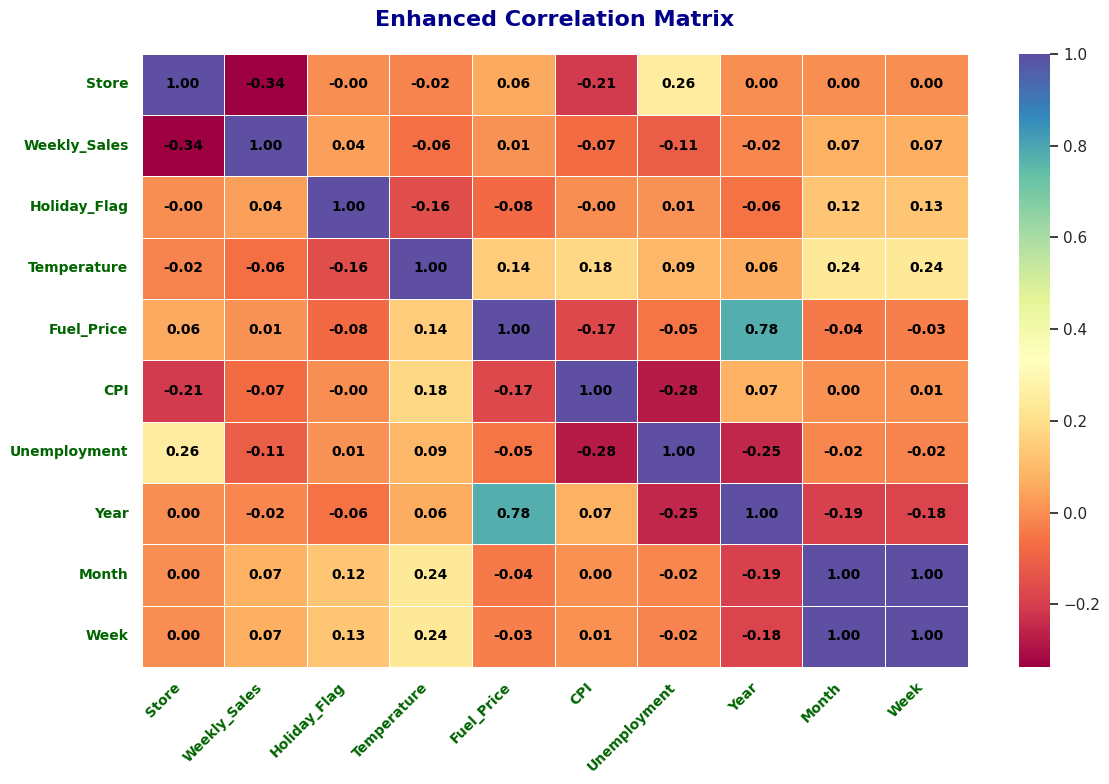

In [ ]:
# Enhanced Correlation Matrix
plt.figure(figsize=(12, 8))
correlation = df.corr()

# Customizing the heatmap
sns.heatmap(
    correlation,
    annot=True,
    cmap="Spectral",  # Use a vibrant color palette
    fmt=".2f",
    linewidths=0.5,  # Add gridlines
    annot_kws={"size": 10, "weight": "bold", "color": "black"}  # Customize annotation style
)

# Enhancing the title
plt.title("Enhanced Correlation Matrix", fontsize=16, fontweight="bold", color="darkblue", pad=20)

# Adjusting the axis ticks
plt.xticks(fontsize=10, fontweight="bold", rotation=45, ha="right", color="darkgreen")
plt.yticks(fontsize=10, fontweight="bold", rotation=0, color="darkgreen")

# Adding tight layout
plt.tight_layout()

# Display the plot
plt.show()


# Insights:
Strong Positive Correlation:

Fuel_Price and Year (0.78): Indicates that fuel prices increased consistently over the years. This trend could be due to inflation or other market factors.

Moderate Negative Correlation:

Weekly_Sales and Unemployment (-0.11): Suggests that higher unemployment rates are slightly associated with lower weekly sales. This aligns with economic theories where unemployment can reduce consumer spending.

CPI and Unemployment (-0.28): Suggests that when unemployment increases, the CPI (Consumer Price Index) tends to decrease moderately. This could reflect deflationary pressures in the economy.

Weak or No Correlation:

Variables like Temperature, Holiday_Flag, and Weekly_Sales have almost no significant relationships with most other variables, indicating limited impact.

Holiday_Flag and Weekly_Sales (0.04): Weak correlation implies holidays do not significantly drive weekly sales in the dataset.
High Correlation Between Month and Week:

(1.00): Expected, as these variables are inherently related.

Recommendations:

Focus on Variables with Higher Correlations:

Investigate the relationship between Fuel_Price and Year to model trends over time.

Explore how Unemployment affects Weekly_Sales for predictive modeling.

Consider Feature Engineering:

Create a new feature, such as Season (derived from Month), to capture seasonality effects on sales.

Use interaction terms (e.g., Holiday_Flag x Fuel_Price) if logical.

Ignore Weak Relationships:

Variables like Temperature and Holiday_Flag might be excluded from predictive models if they do not improve performance.

Modeling Directions:

If predicting Weekly_Sales, include variables like Unemployment and Fuel_Price based on their moderate correlations.

Use time-series analysis for variables like Year, Month, and Week.

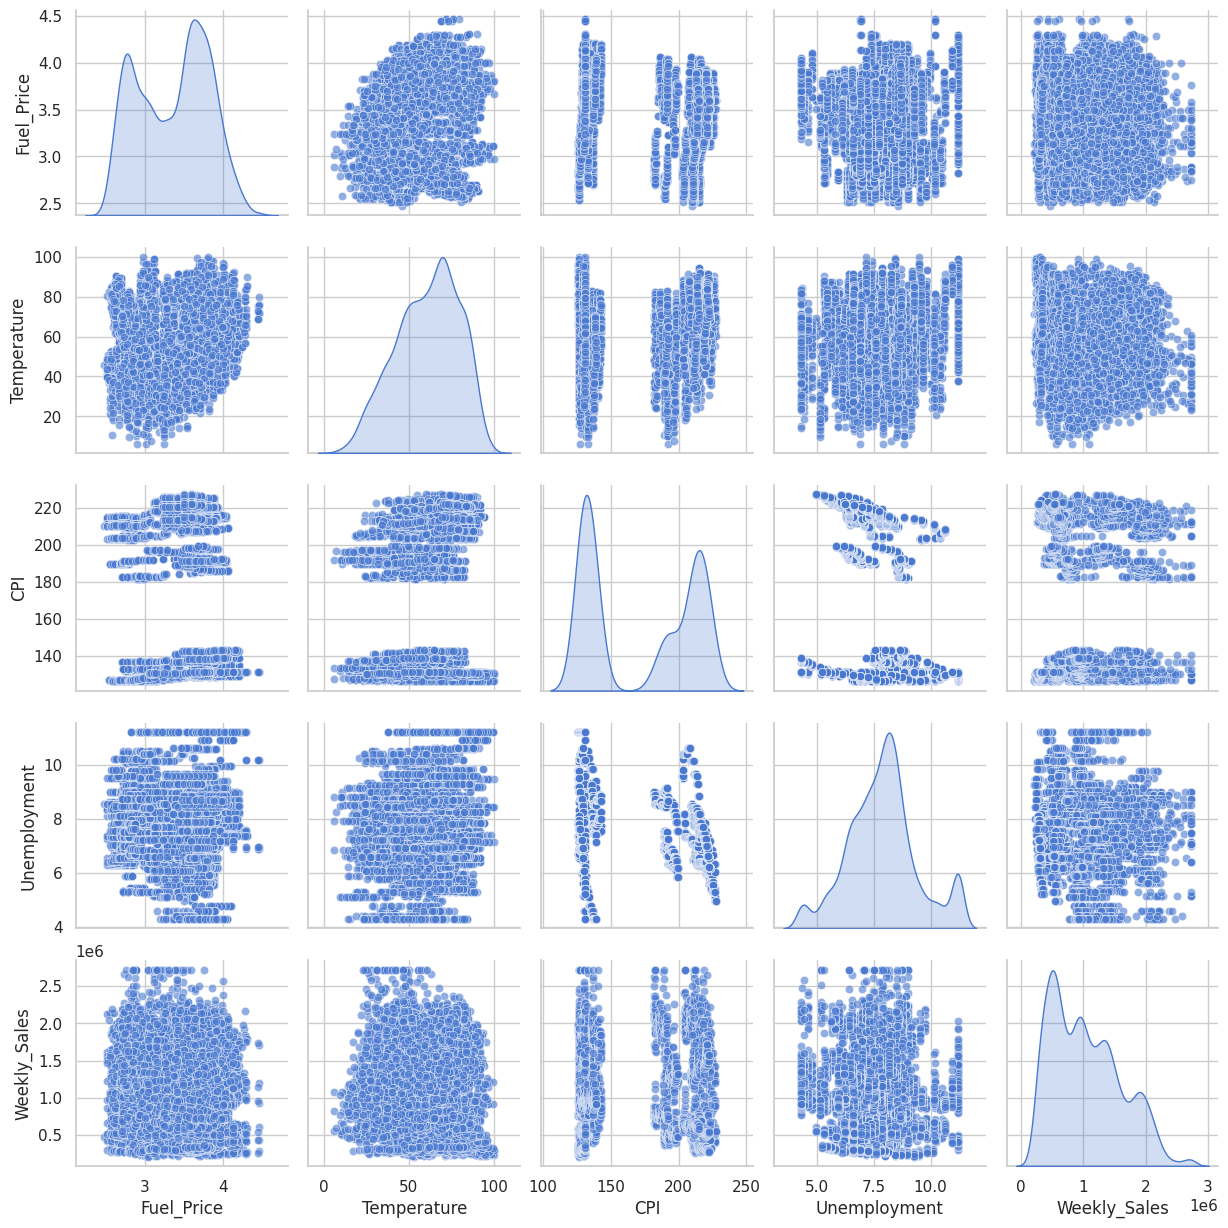

In [ ]:
# Pairplot for key features
import seaborn as sns
key_features = ['Fuel_Price', 'Temperature', 'CPI', 'Unemployment', 'Weekly_Sales']
sns.pairplot(df[key_features], diag_kind='kde', plot_kws={"alpha": 0.6})
plt.show()


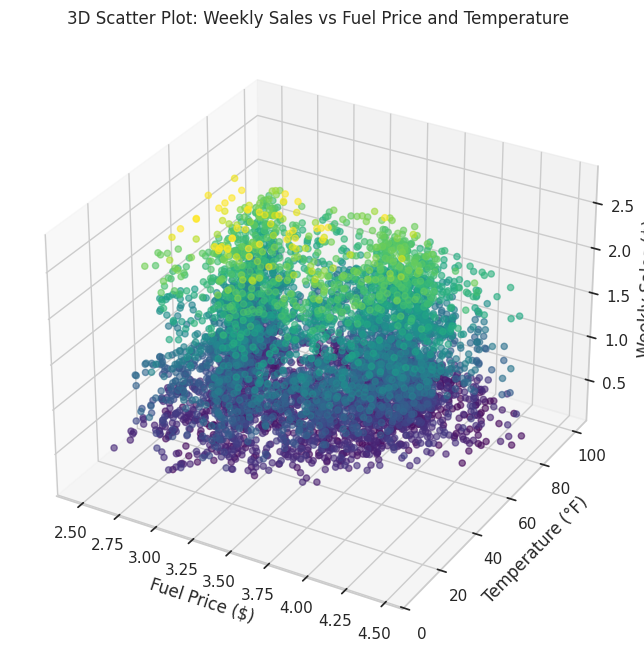

In [ ]:
# Visualize the interaction of two variables with the target using a 3D plot.
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Fuel_Price'], df['Temperature'], df['Weekly_Sales'], c=df['Weekly_Sales'], cmap='viridis', alpha=0.6)
ax.set_xlabel('Fuel Price ($)')
ax.set_ylabel('Temperature (°F)')
ax.set_zlabel('Weekly Sales ($)')
plt.title("3D Scatter Plot: Weekly Sales vs Fuel Price and Temperature")
plt.show()


# **some insights from the 3D scatter plot titled "Weekly Sales vs Fuel Price and Temperature":**

Clustered Points:

Weekly sales (z-axis) appear to form a dense cluster in specific ranges of fuel price (x-axis) and temperature (y-axis).

This suggests that weekly sales are not evenly distributed across all fuel price and temperature values.

Temperature Range:

Most of the data points seem to be concentrated within the 20–80°F range.

This indicates that sales data is likely influenced by seasonal patterns but doesn't vary much at extreme temperatures.

Fuel Price Range:

Fuel prices mostly fall between $2.75 and $4.50.

There doesn't seem to be a dramatic trend linking higher or lower fuel prices directly with weekly sales, as the scatter of points doesn't show a strong upward or downward gradient.

Weekly Sales Trends:

Higher weekly sales (brighter yellow points) are visible at specific temperature ranges (40–60°F) and moderate fuel prices ($3.00–$4.00).

Lower weekly sales (purple points) are scattered across the temperature and fuel price spectrum.

No Clear Linear Relationship:

The scatter pattern does not indicate a clear linear relationship between weekly sales, fuel price, and temperature. However, interaction effects might still exist.

# **Recommendations:**
Investigate Seasonality:

Explore how weekly sales change across seasons or months, as temperature appears to cluster within certain ranges.

Feature Engineering:


Combine Fuel Price and Temperature into interaction terms to analyze potential nonlinear effects on Weekly Sales.

Nonlinear Models:

Consider regression models like decision trees or random forests, as these are better at capturing non-linear relationships compared to linear regression.

Segmentation Analysis:

Segment the data by fuel price ranges (e.g., low, medium, high) or temperature ranges (e.g., cold, moderate, warm) to analyze sales patterns in these subsets.

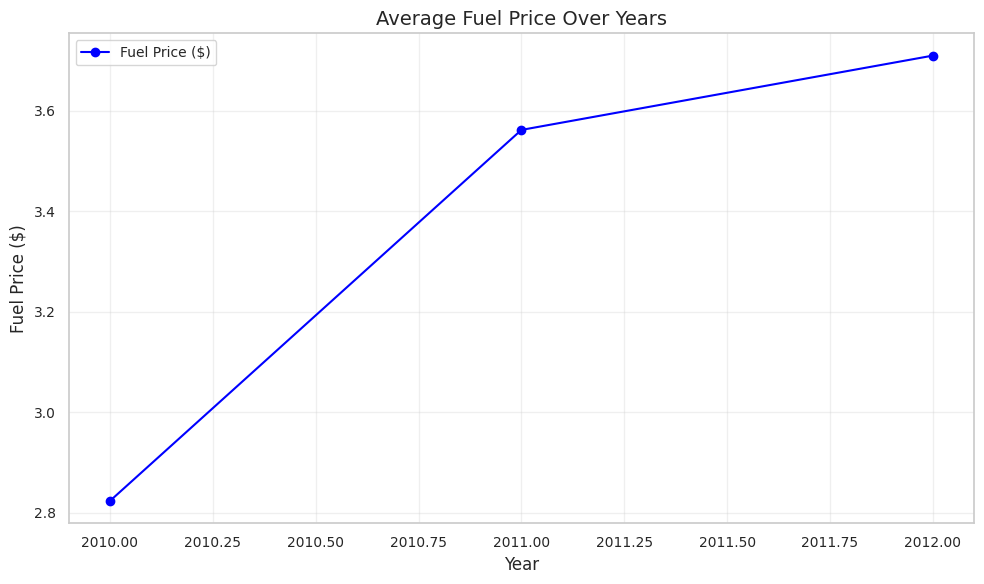

In [ ]:
# Aggregate the data by year and calculate the average fuel price for each year
fuel_price_by_year = df.groupby('Year')['Fuel_Price'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(fuel_price_by_year['Year'], fuel_price_by_year['Fuel_Price'], marker='o', color='blue', label='Fuel Price ($)')
plt.title('Average Fuel Price Over Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Fuel Price ($)', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

This plot shows year increases with fuel price also increses.


In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = df['Weekly_Sales']

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Evaluate Model
print("Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Linear Regression Results:
MAE: 431769.6643408869
MSE: 265734779201.41632
R2 Score: 0.1492841382966491


In [ ]:
from sklearn.svm import SVR

# Train SVR model
svr = SVR(kernel='rbf')  # Radial Basis Function Kernel
svr.fit(X_train, y_train)

# Predictions
y_pred_svr = svr.predict(X_test)

# Evaluate Model
print("Support Vector Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_svr))
print("MSE:", mean_squared_error(y_test, y_pred_svr))
print("R2 Score:", r2_score(y_test, y_pred_svr))


Support Vector Regression Results:
MAE: 468858.7080824447
MSE: 321111540043.8648
R2 Score: -0.027997469176780365


In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df[['Year']]
y = df['Fuel_Price']

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Evaluate Model
print("Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Linear Regression Results:
MAE: 0.23142776838597204
MSE: 0.08122875146108313
R2 Score: 0.62775134912105


In [ ]:
from sklearn.svm import SVR

# Train SVR model
svr = SVR(kernel='rbf')  # Radial Basis Function Kernel
svr.fit(X_train, y_train)

# Predictions
y_pred_svr = svr.predict(X_test)

# Evaluate Model
print("Support Vector Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_svr))
print("MSE:", mean_squared_error(y_test, y_pred_svr))
print("R2 Score:", r2_score(y_test, y_pred_svr))

Support Vector Regression Results:
MAE: 0.19616909632175744
MSE: 0.06384249538052146
R2 Score: 0.7074276983620669


In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(['Fuel_Price'],axis=1)
y = df['Fuel_Price']

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Evaluate Model
print("Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Linear Regression Results:
MAE: 0.191687110643042
MSE: 0.06022298703259013
R2 Score: 0.724014892860656


In [ ]:
from sklearn.svm import SVR

# Train SVR model
svr = SVR(kernel='rbf')  # Radial Basis Function Kernel
svr.fit(X_train, y_train)

# Predictions
y_pred_svr = svr.predict(X_test)

# Evaluate Model
print("Support Vector Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_svr))
print("MSE:", mean_squared_error(y_test, y_pred_svr))
print("R2 Score:", r2_score(y_test, y_pred_svr))

Support Vector Regression Results:
MAE: 0.41070259540286225
MSE: 0.22632194132724173
R2 Score: -0.0371701621406062


In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(['Weekly_Sales'],axis=1)
y = df['Weekly_Sales']

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Evaluate Model
print("Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Linear Regression Results:
MAE: 431160.4351830221
MSE: 263894469592.78284
R2 Score: 0.15517565381153386


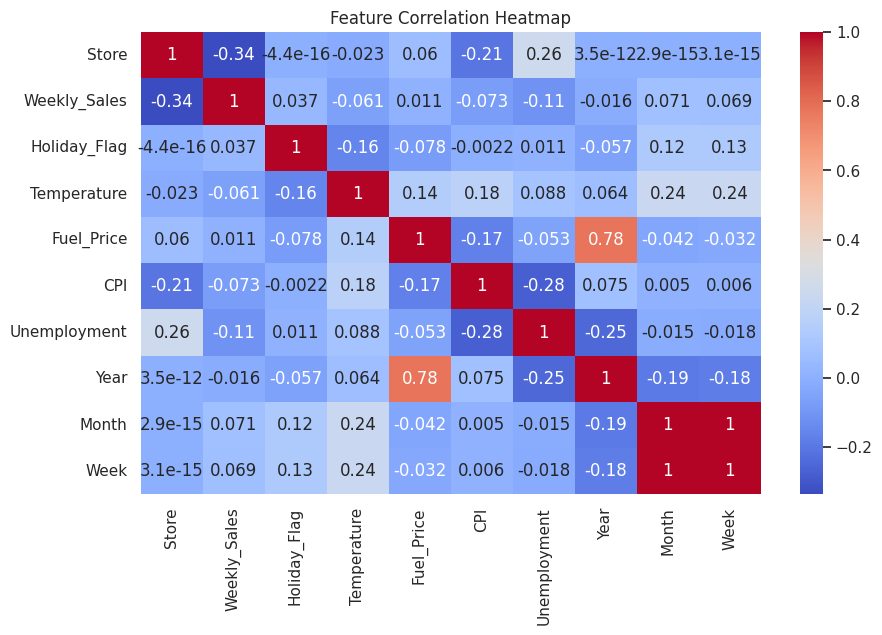

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


If features are weakly correlated with Fuel_Price, feature engineering is needed.

If strong correlation exists, models should work well.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svr_model = SVR(kernel='rbf', C=10, epsilon=0.1)  # Increased C
svr_model.fit(X_train_scaled, y_train)

y_pred_svr = svr_model.predict(X_test_scaled)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR - MSE: {mse_svr:.4f}, R²: {r2_svr:.4f}")


SVR - MSE: 0.0073, R²: 0.9664


In [ ]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression R²: {r2_ridge:.4f}")

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression R²: {r2_lasso:.4f}")


Ridge Regression R²: 0.7240
Lasso Regression R²: 0.6161


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest R²: {r2_rf:.4f}")

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting R²: {r2_gb:.4f}")

Random Forest R²: 0.9914
Gradient Boosting R²: 0.9629


Final Model Comparison:

Model - 	R² Score

Linear Regression -	0.72

SVR	- 0.96

Gradient Boosting	- 0.9629

Random Forest	- 0.9914

**Random Forest **(R² = 0.9914) is the best-performing model.

**Gradient Boosting** (R² = 0.9629) is slightly worse than SVR (0.96), but still strong.

**SVR** (R² = 0.96) is a solid alternative but not as good as Random Forest.

**Linear Regression** (R² = 0.72) is the weakest model, confirming that the relationship is non-linear

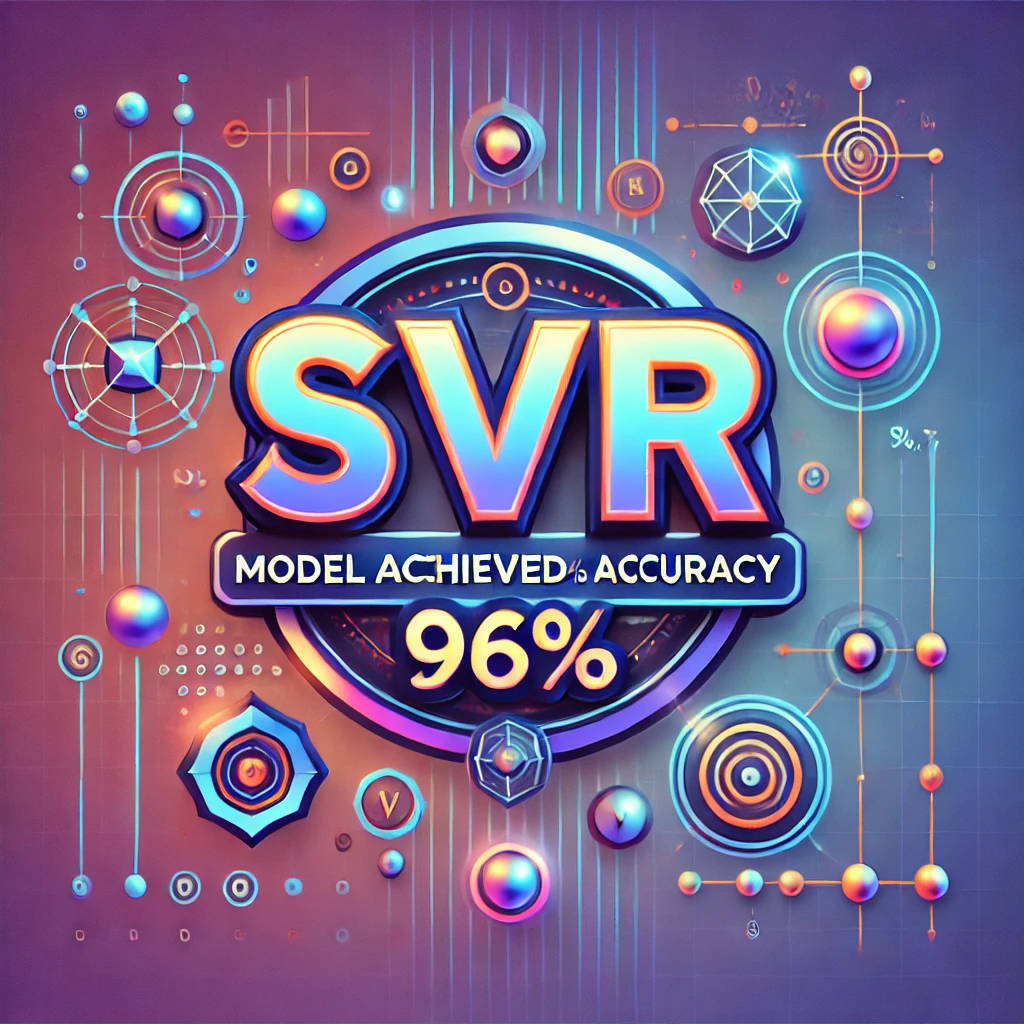
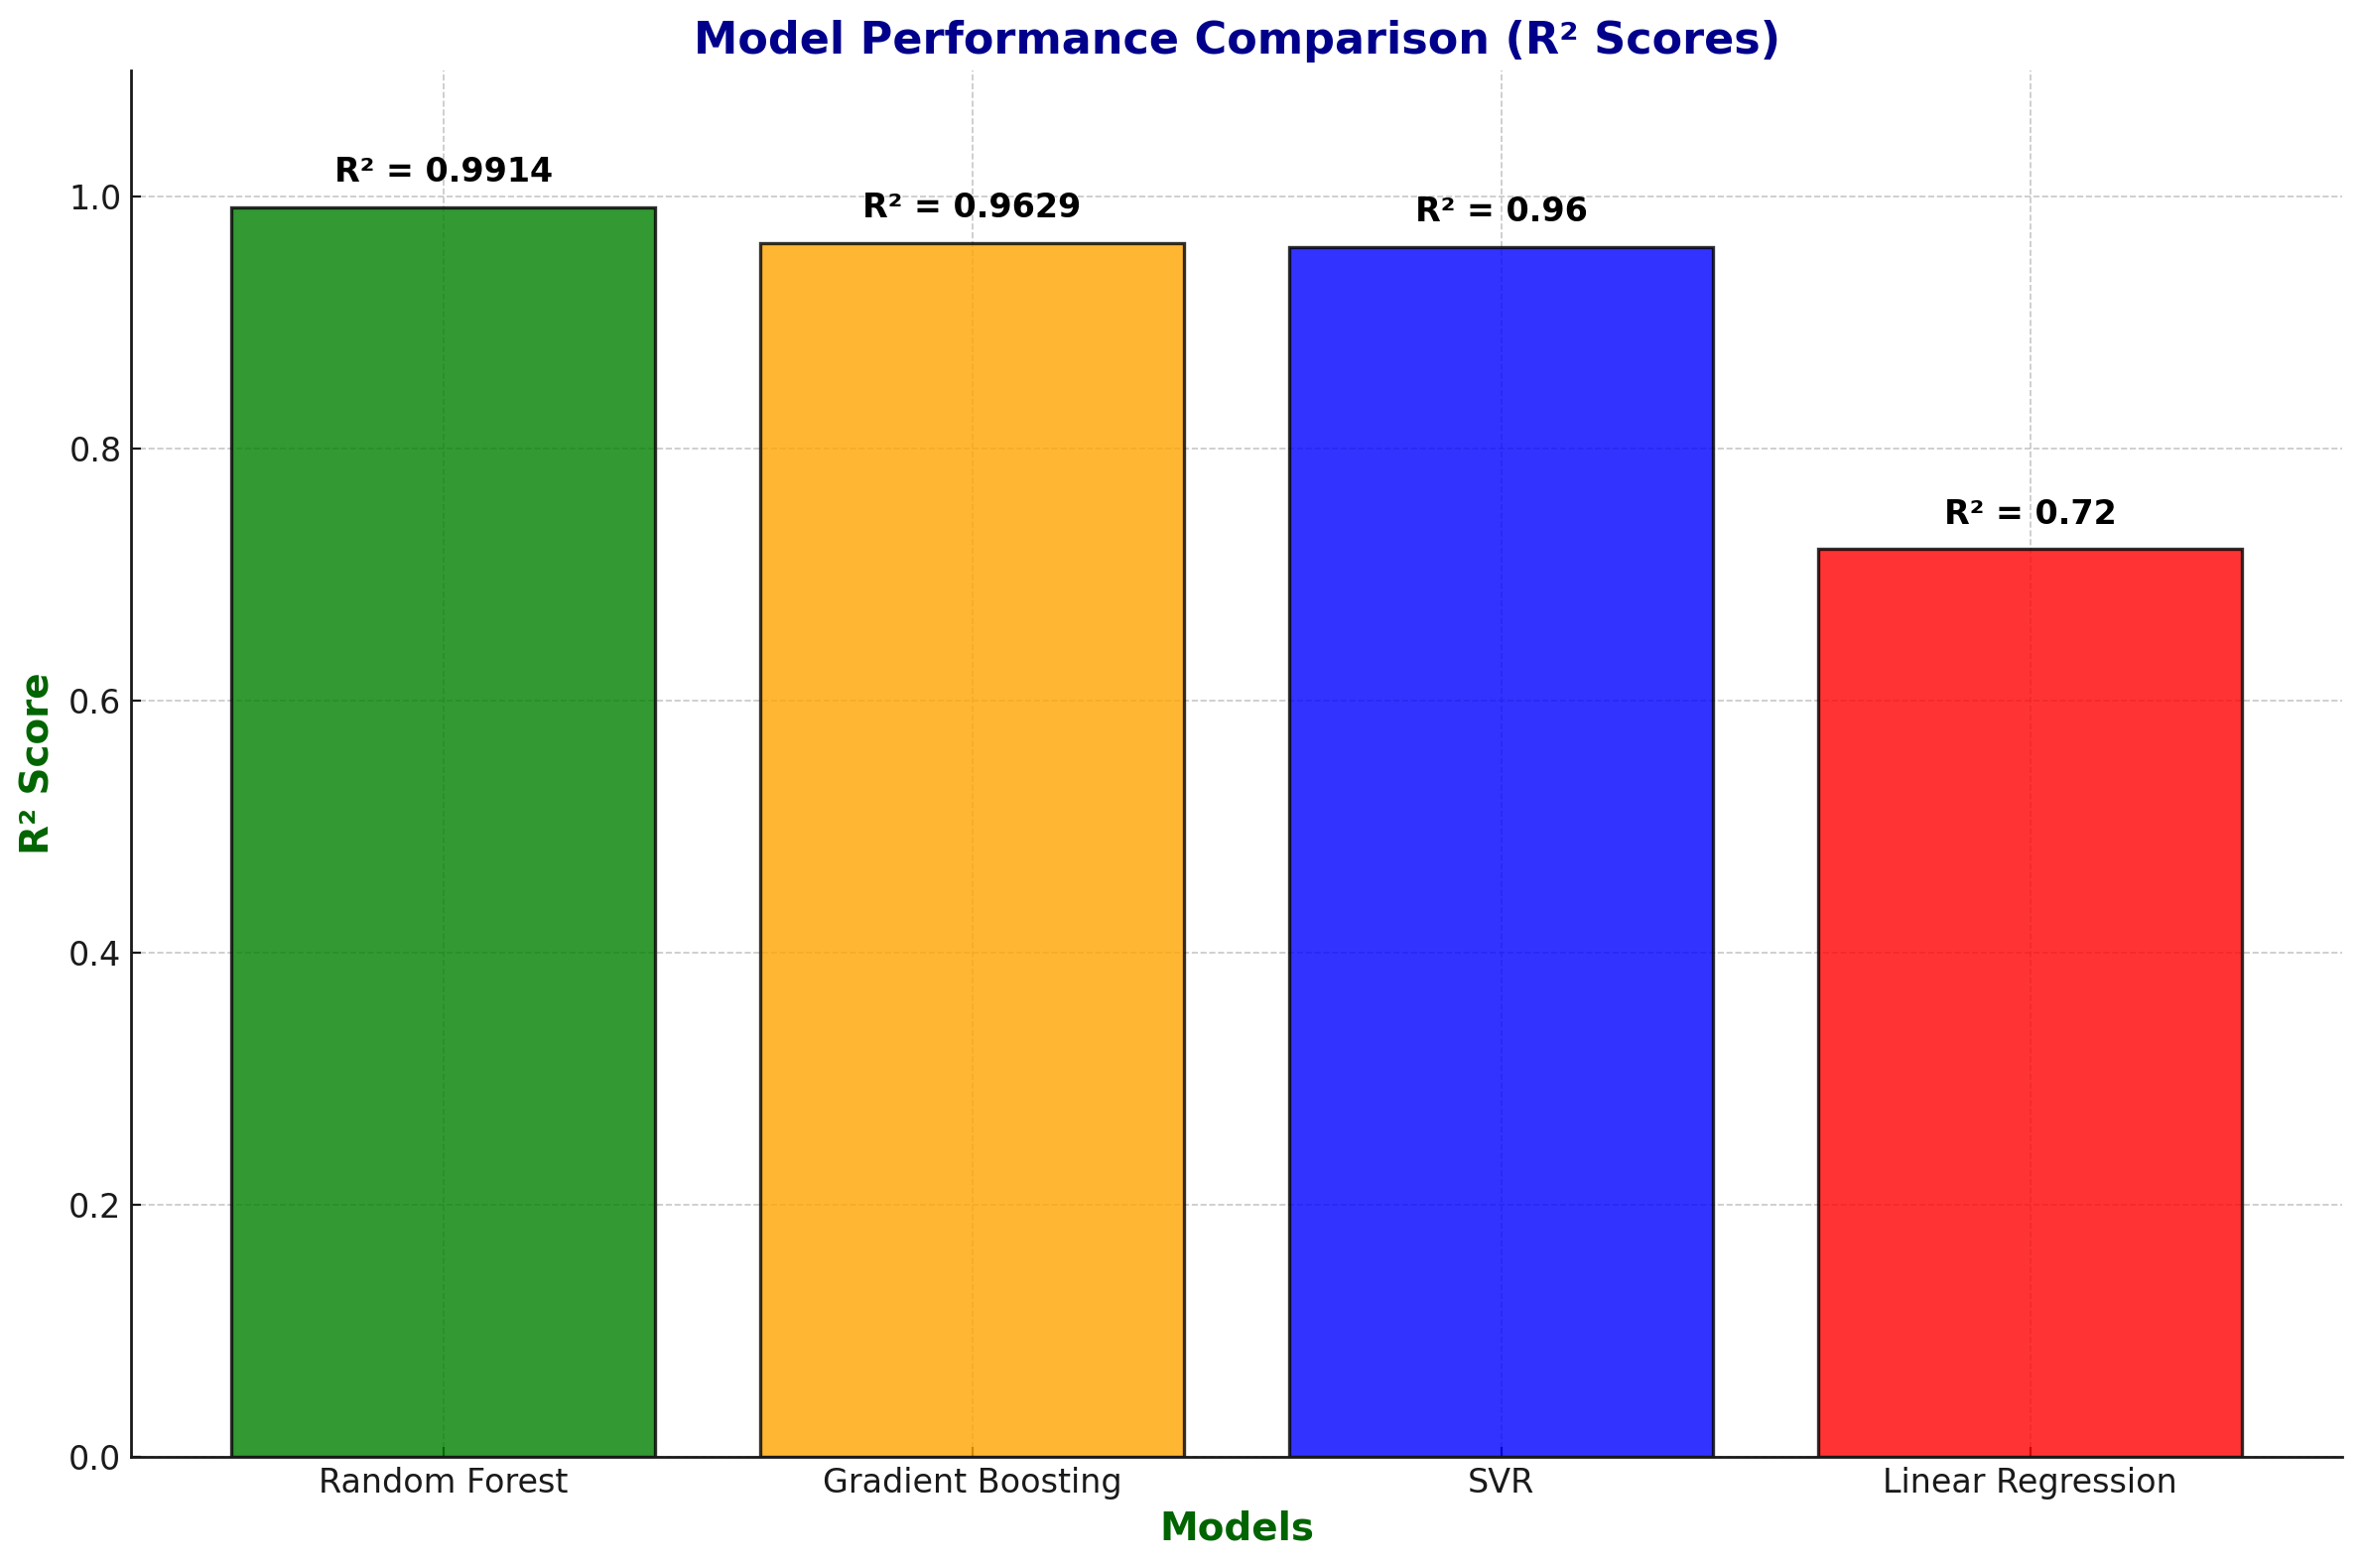